<img src="./img/Logo.jpg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo Semanal 5

### Juan Manuel Ronchetti
### Grupo 3 2023

## Ploteo de datos en Python

Previo a la realizacion del trabajo practico, se realizó un script de Python para graficar la respuesta de modulo y fase a obtener en el laboratorio.

Para probar el script, se realizaron los siguientes graficos con datos proporcionados por la catedra:

<Axes: xlabel='X (Hz)'>

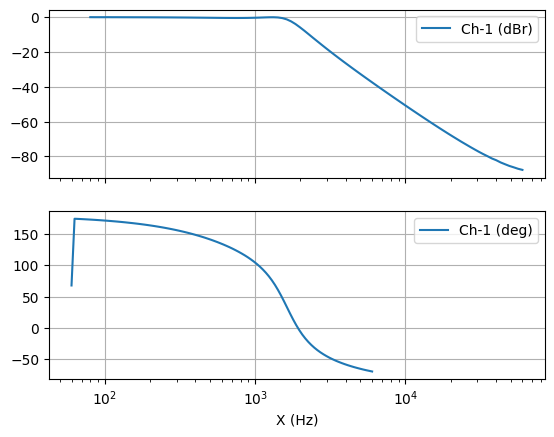

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 

modulo  = pd.read_csv("modulo2.csv")
fase  = pd.read_csv("fase2.csv")

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

modulo.plot(kind='line', ax=axes[0], x='X (Hz)',y='Ch-1 (dBr)', logx=True, grid=True)
fase.plot(kind='line', ax=axes[1], x='X (Hz)',y='Ch-1 (deg)', logx=True, grid=True)

## Diseño del filtro

En este trabajo, se pide diseñar un filtro que cumpla con la siguiente plantilla (la D):

<img src="./img/Plantilla.png"  width=650 /> 

### Obtencion de la transferencia

Se parte del siguiente desarrollo en papel:

<img src="./img/Papel1.jpg"  width=650 /> 
<img src="./img/Papel2.jpg"  width=650 /> 

### Simulacion numerica

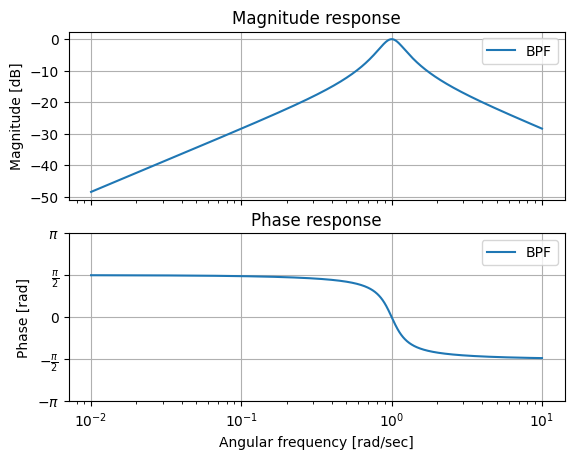

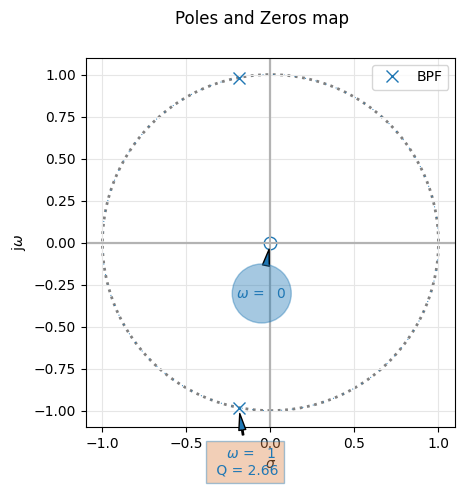

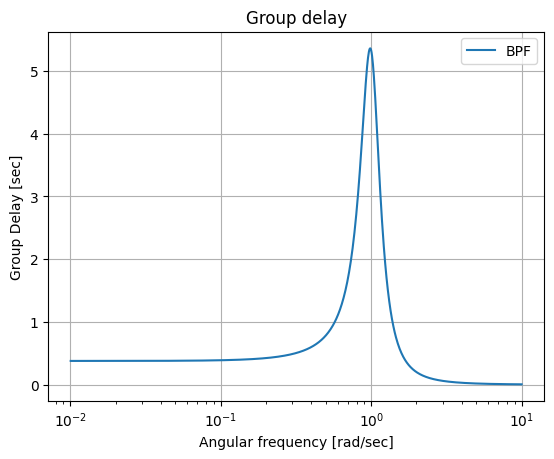

In [10]:
import sympy as sp
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys

num= [0.3766, 0]
den= [1, 0.3766, 1]

#w0=1
#Q=2.654

tf_bp = sig.TransferFunction(num, den)
analyze_sys( tf_bp, 'BPF' )

Se observa que el filtro diseñado cumple con lo pedido.

### Diseño con UAF42

A partir de la transferencia obtenida, se realiza el diseño del filtro utilizando el circuito integrado UAF42:

<img src="./img/Disenio2.png"  width=650 /> 
<img src="./img/Disenio1.png"  width=650 /> 

### Placa experimental

A partir del circuito diseñado, se busco implementarlo en una placa experimental. A continuacion se detallan el esquematico y el resultado final:

<img src="./img/Esquematico.png"  width=250 /> 
<img src="./img/Placa1.png"  width=250 /> 
<img src="./img/Placa2.png"  width=250 /> 

### Simulacion circuital

Para verificar el diseño, se construyó el circuito implementado con el UAF42 en LTSpice, adecuando los valores de las resistencias a los medidos en la placa experimental:

<img src="./img/CircuitoSpice.png"  width=650 /> 

Se realizaron las siguientes simulaciones:

<img src="./img/Sim1.png"  width=650 /> 
<img src="./img/Sim2.png"  width=650 /> 
<img src="./img/Sim3.png"  width=650 /> 

Se observan los siguientes valores:

* Ganancia en $f_0$ (5.99k) = 0.733dB
* Ganancia en BW ($f_0 \pm 953Hz$) = -2.11dB (inferior) ; -1.48 (superior)
* Ganancia en $f_{s_{MIN}}$ (0.6k) = -27.92dB
* Ganancia en $f_{s_{MAX}}$ (60k) = -28.01dB

## Pruebas pre-laboratorio

El dia 23/06/2023 se concurrio al laboratorio abierto de electronica a probar el circuito obtenido. Se realizaron pruebas para verificar que cumpliera con lo calculado y funcionara dentro de lo esperado. 

Luego, se realizo un barrido en frecuencia, tomando los valores RMS de la entrada y la salida, para luego poder graficar su relacion en contraste a la frecuencia.

A continuacion se muestran imagenes de la configuracion experimental:

<img src="./img/Foto2.png"  width=650 /> 
<img src="./img/Foto3.png"  width=650 />
<img src="./img/Foto1.png"  width=650 /> 

### Grafico

Con los datos obtenidos se realizo el siguiente grafico:

<Axes: xlabel='X (Hz)'>

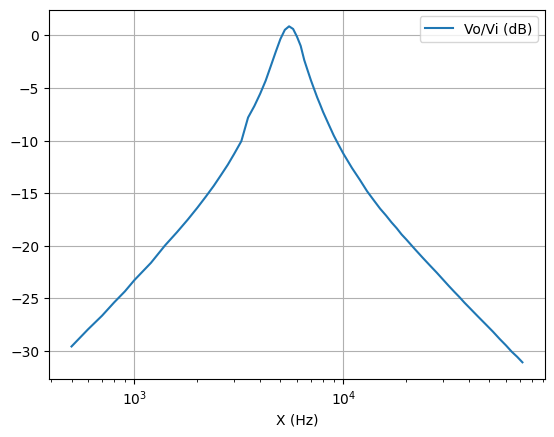

In [8]:
modulo  = pd.read_csv("Pre TPLAB.csv")
modulo.plot(kind='line', x='X (Hz)',y='Vo/Vi (dB)', logx=True, grid=True)

Se observa que en principio la transferencia cumple con lo esperado. El dia 26/06/2023 se concurrira al laboratorio a realizar una experimentacion mas profunda.